<a href="https://colab.research.google.com/github/mrudulmamtani/EDA-DA-1/blob/main/Mrudul_Mamtani_(22BCE3721).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) Assignment MRUDUL MAMTANI 22BCE3721

## Overview

This repository contains the Exploratory Data Analysis (EDA) assignment, which focuses on analyzing smoking habits and their associated factors. The analysis is conducted using Python, leveraging libraries such as Pandas, NumPy, Matplotlib, and Seaborn.

repository link: https://github.com/mrudulmamtani/EDA-DA-1


In [107]:
import pandas as pd
import numpy as np

In [108]:
#reading the dataframe
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/smoking.csv')
df.head(10)

,rownames,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
5,6,Female,37,Married,GCSE/O Level,British,White,"15,600 to 20,800",The North,No,NaN,NaN,NaN
6,7,Male,53,Married,Degree,British,White,"Above 36,400",The North,Yes,6.0,6.0,Packets
7,8,Male,44,Single,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
8,9,Male,40,Single,GCSE/CSE,English,White,"2,600 to 5,200",The North,Yes,8.0,8.0,Hand-Rolled
9,10,Female,41,Married,No Qualification,English,White,"5,200 to 10,400",The North,Yes,15.0,12.0,Packets


Lets see the values in the columns

In [109]:
#values in nationality
df['nationality'].value_counts()

,count
nationality,
English,833
British,538
Scottish,142
Other,71
Welsh,66
Irish,23
Refused,17
Unknown,1


In [110]:
#values in region
df['region'].value_counts()

,count
region,
Midlands & East Anglia,443
The North,426
South East,252
London,182
South West,157
Scotland,148
Wales,83


In [111]:
#values in gender
df['gender'].value_counts()

,count
gender,
Female,965
Male,726


In [112]:
#values in gross_income
df['gross_income'].value_counts()

,count
gross_income,
"5,200 to 10,400",396
"10,400 to 15,600",268
"2,600 to 5,200",257
"15,600 to 20,800",188
"20,800 to 28,600",155
"Under 2,600",133
Refused,108
"Above 36,400",89
"28,600 to 36,400",79


In [113]:
#values in education level
df['highest_qualification'].value_counts()

,count
highest_qualification,
No Qualification,586
GCSE/O Level,308
Degree,262
Other/Sub Degree,127
Higher/Sub Degree,125
A Levels,105
GCSE/CSE,102
ONC/BTEC,76


In [114]:
#values in column ethnicity
df['ethnicity'].value_counts()

,count
ethnicity,
White,1560
Asian,41
Black,34
Chinese,27
Mixed,14
Refused,13
Unknown,2


In [115]:
#values in type
df['type'].value_counts()

,count
type,
Packets,297
Hand-Rolled,72
Both/Mainly Packets,42
Both/Mainly Hand-Rolled,10


In [116]:
#checking and dropping duplicates:
frame3 = df['rownames']
frame3.duplicated()
frame3.drop_duplicates()

,rownames
0,1
1,2
2,3
3,4
4,5
...,...
1686,1687
1687,1688
1688,1689
1689,1690


In [117]:
#dropping rownames as we already have index
df = df.drop(columns=['rownames'])


In [118]:
#standard statitical information
df.describe()

,age,amt_weekends,amt_weekdays
count,1691.000000,421.000000,421.000000
mean,49.836192,16.410926,13.750594
std,18.736851,9.892988,9.388292
min,16.000000,0.000000,0.000000
25%,34.000000,10.000000,7.000000
50%,48.000000,15.000000,12.000000
75%,65.500000,20.000000,20.000000
max,97.000000,60.000000,55.000000


In [119]:
# Smoking habits change with age, such as starting or quitting smoking at certain age ranges.

# Create age bins
age_bins = [18, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
df['age_group'].value_counts()


,count
age_group,
30-39,342
40-49,272
50-59,247
18-29,239
60-69,237
70-79,228
80-89,70


In [120]:
# replacing refused with unknown to reduce classes
dfn = df['nationality']
dfn.replace(to_replace = 'Refused', value = 'Unknown', inplace = True)

dfgi = df['gross_income']
dfgi.replace(to_replace = 'Refused', value = 'Unknown', inplace = True)

dfe = df['ethnicity']
dfe.replace(to_replace = 'Refused', value = 'Unknown', inplace = True)


In [121]:
#dropping rows with only NaN values
df.dropna(how = 'all')


,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type,age_group
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN,30-39
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets,40-49
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN,30-39
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN,30-39
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,No,NaN,NaN,NaN,18-29
1687,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Hand-Rolled,40-49
1688,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,No,NaN,NaN,NaN,40-49
1689,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Packets,50-59


In [122]:
#dropping Columns with NaN values
df.dropna(how = 'all', axis = 1)

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type,age_group
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN,30-39
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets,40-49
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN,30-39
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN,30-39
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,No,NaN,NaN,NaN,18-29
1687,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Hand-Rolled,40-49
1688,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,No,NaN,NaN,NaN,40-49
1689,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Packets,50-59


In [123]:
#checking amount of null values
df.isnull().sum()

,0
gender,0
age,0
marital_status,0
highest_qualification,0
nationality,0
ethnicity,0
gross_income,0
region,0
smoke,0
amt_weekends,1270


By above analysis we can see that 'amt_weekends' 'amt_weekdays' 'type' all have equal number of null values. this may indicate the people who dont smoke

In [124]:
#checking the assumption
df[df['smoke'] == 'Yes'].isnull().sum()


,0
gender,0
age,0
marital_status,0
highest_qualification,0
nationality,0
ethnicity,0
gross_income,0
region,0
smoke,0
amt_weekends,0


In [125]:
#lets change the null values in type to Not Applicable 'NA'
df.replace(to_replace = np.nan, value = 'NA', inplace = True)
df.isnull().sum()

,0
gender,0
age,0
marital_status,0
highest_qualification,0
nationality,0
ethnicity,0
gross_income,0
region,0
smoke,0
amt_weekends,0


#**Visualizing the Data**

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df.dtypes

,0
gender,object
age,int64
marital_status,object
highest_qualification,object
nationality,object
ethnicity,object
gross_income,object
region,object
smoke,object
amt_weekends,object


In [128]:
print(df.describe())

               age
count  1691.000000
mean     49.836192
std      18.736851
min      16.000000
25%      34.000000
50%      48.000000
75%      65.500000
max      97.000000


In [129]:
mean = df["age"].mean()
median =df["age"].median()
mode = df["age"].mode()
print(mean , median, mode)

49.836191602602014 48.0 0    40
Name: age, dtype: int64


In [131]:
# calculate the proportion of smokers versus non-smokers in the dataset.
smoker_counts = df['smoke'].value_counts()
total_count = len(df)
smoker_proportions = smoker_counts / total_count * 100
print("Proportion of smokers vs non-smokers:")
print(smoker_proportions, "\n")


Proportion of smokers vs non-smokers:
smoke
No     75.103489
Yes    24.896511
Name: count, dtype: float64 



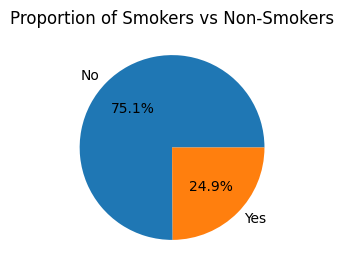

In [214]:
# Pie chart of smokers vs non-smokers
plt.figure(figsize=(3,3))
plt.pie(smoker_proportions, labels=smoker_proportions.index, autopct='%1.1f%%')
plt.title('Proportion of Smokers vs Non-Smokers')
plt.show()

Text(0.5, 0, 'age')

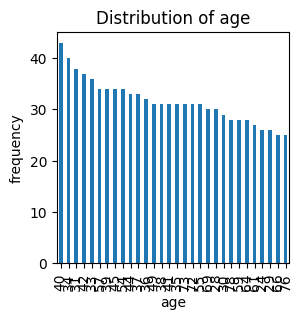

In [215]:
df.age.value_counts().nlargest(30).plot(kind='bar', figsize=(3,3))
plt.title("Distribution of age")
plt.ylabel('frequency')
plt.xlabel('age')

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 300x300 with 0 Axes>

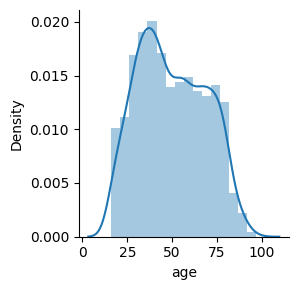

In [216]:
#8. Distribution plot
plt.figure(figsize=(3,3))
sns.FacetGrid(df).map(sns.distplot,"age").add_legend()

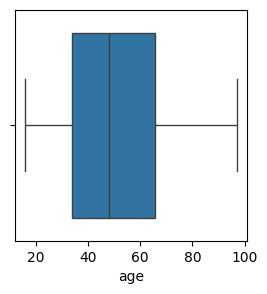

In [217]:
#boxplot for age
plt.figure(figsize=(3,3))
sns.boxplot(x="age",data=df)
plt.show()

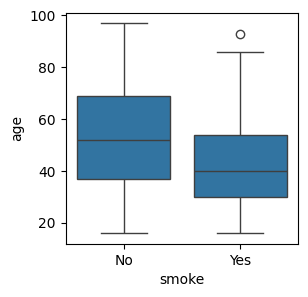

In [220]:
plt.figure(figsize=(3,3))
sns.boxplot(x="smoke",y="age",data=df)
plt.show()

In [137]:
df_only_smokers = df.drop(df[df['smoke'] == 'No'].index)
df_only_smokers.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type,age_group
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets,40-49
6,Male,53,Married,Degree,British,White,"Above 36,400",The North,Yes,6.0,6.0,Packets,50-59
8,Male,40,Single,GCSE/CSE,English,White,"2,600 to 5,200",The North,Yes,8.0,8.0,Hand-Rolled,30-39
9,Female,41,Married,No Qualification,English,White,"5,200 to 10,400",The North,Yes,15.0,12.0,Packets,40-49
20,Female,34,Married,GCSE/CSE,British,White,"2,600 to 5,200",The North,Yes,6.0,12.0,Packets,30-39


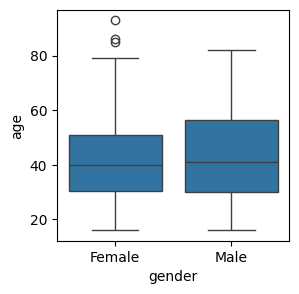

In [221]:
plt.figure(figsize=(3,3))
sns.boxplot(x="gender",y="age",data=df_only_smokers)
plt.show()

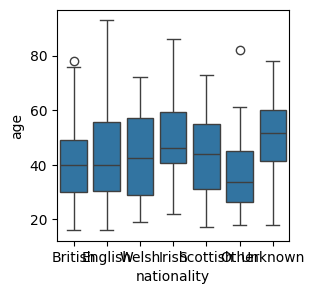

In [222]:
plt.figure(figsize=(3,3))
sns.boxplot(x="nationality",y="age",data= df_only_smokers)
plt.show()

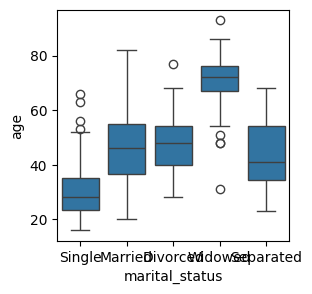

In [223]:
plt.figure(figsize=(3,3))
sns.boxplot(x="marital_status",y="age",data= df_only_smokers)
plt.show()

In [141]:
# Education and Smoking:
education_smoking = df.groupby('highest_qualification')['smoke'].value_counts(normalize=True).unstack().fillna(0) * 100

print("Smoking status by education level (in percentages):")
print(education_smoking, "\n")

Smoking status by education level (in percentages):
smoke                         No        Yes
highest_qualification                      
A Levels               80.000000  20.000000
Degree                 85.114504  14.885496
GCSE/CSE               62.745098  37.254902
GCSE/O Level           65.909091  34.090909
Higher/Sub Degree      78.400000  21.600000
No Qualification       76.621160  23.378840
ONC/BTEC               69.736842  30.263158
Other/Sub Degree       75.590551  24.409449 



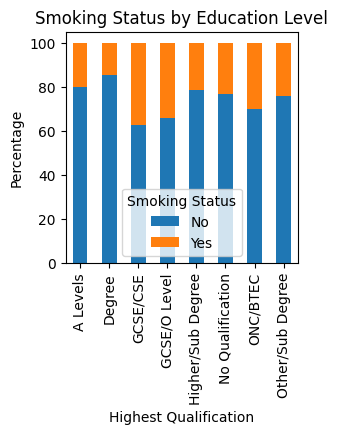

In [224]:
# Stacked bar chart of smoking status by education level
education_smoking.plot(kind='bar', stacked=True, figsize=(3,3))
plt.title('Smoking Status by Education Level')
plt.xlabel('Highest Qualification')
plt.ylabel('Percentage')
plt.legend(title='Smoking Status')
plt.show()

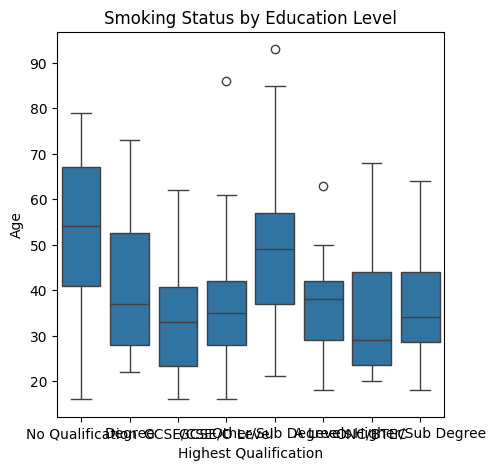

In [225]:
plt.figure(figsize=(5,5))
sns.boxplot(x="highest_qualification", y ="age", data= df_only_smokers)
plt.title('Smoking Status by Education Level')
plt.ylabel('Age')
plt.xlabel('Highest Qualification')
plt.show()

In [144]:
# Analyze the average amount smoked on weekdays and weekends, and determine if there's a significant difference.
from scipy.stats import ttest_ind
# Filter out non-smokers and rows with missing data in 'amt_weekdays' or 'amt_weekends'
smokers_df = df[df['smoke'] == 'Yes'].dropna(subset=['amt_weekdays', 'amt_weekends'])

smokers_df['amt_weekdays'] = pd.to_numeric(smokers_df['amt_weekdays'], errors='coerce')
smokers_df['amt_weekends'] = pd.to_numeric(smokers_df['amt_weekends'], errors='coerce')

# Calculate means
mean_weekdays = smokers_df['amt_weekdays'].mean()
mean_weekends = smokers_df['amt_weekends'].mean()

print(f"Average amount smoked on weekdays: {mean_weekdays:.2f}")
print(f"Average amount smoked on weekends: {mean_weekends:.2f}")


Average amount smoked on weekdays: 13.75
Average amount smoked on weekends: 16.41


In [145]:
# Perform t-test to check for significant difference
t_stat, p_value = ttest_ind(smokers_df['amt_weekdays'], smokers_df['amt_weekends'])

print(f"T-test statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("There is a significant difference between weekday and weekend smoking amounts.\n")
else:
    print("There is no significant difference between weekday and weekend smoking amounts.\n")


T-test statistic: -4.00
P-value: 0.0001
There is a significant difference between weekday and weekend smoking amounts.



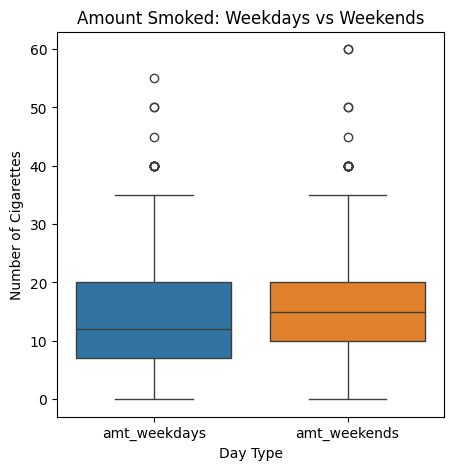

In [226]:
# Boxplot of amount smoked on weekdays vs weekends
plt.figure(figsize=(5,5))
sns.boxplot(data=smokers_df[['amt_weekdays', 'amt_weekends']])
plt.title('Amount Smoked: Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Number of Cigarettes')
plt.show()


In [147]:
# The distribution of tobacco types among smokers.
tobacco_distribution = smokers_df['type'].value_counts(normalize=True) * 100

print("Distribution of tobacco types among smokers:")
print(tobacco_distribution, "\n")

Distribution of tobacco types among smokers:
type
Packets                    70.546318
Hand-Rolled                17.102138
Both/Mainly Packets         9.976247
Both/Mainly Hand-Rolled     2.375297
Name: proportion, dtype: float64 



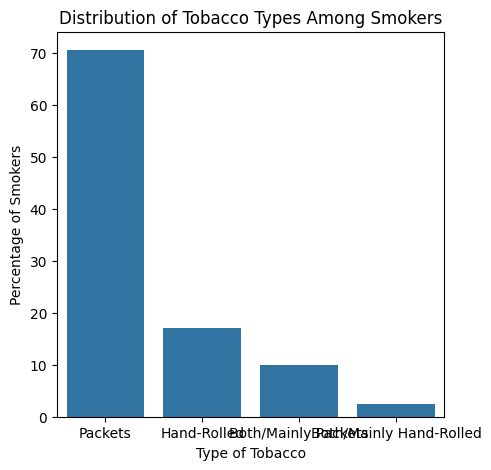

In [227]:
plt.figure(figsize=(5,5))
sns.barplot(x=tobacco_distribution.index, y=tobacco_distribution.values)
plt.title('Distribution of Tobacco Types Among Smokers')
plt.xlabel('Type of Tobacco')
plt.ylabel('Percentage of Smokers')
plt.show()

In [150]:
def income_midpoint(income_str):
    if pd.isna(income_str) or income_str in ['Unknown']:
        return np.nan
    income_str = income_str.replace(',', '')  # Remove commas
    if 'Under' in income_str:
        return 1300  # Midpoint
    if 'Above' in income_str:
        return 40000
    low, high = income_str.split(' to ')
    return (int(low) + int(high)) / 2

#using it in our df
df['income_midpoint'] = df['gross_income'].apply(income_midpoint)

# converting 'amt_weekdays' to numeric
df['amt_weekdays'] = pd.to_numeric(df['amt_weekdays'], errors='coerce')


correlation_df = df[['age', 'income_midpoint', 'amt_weekdays']].dropna()

#correlation matrix
correlation_matrix = correlation_df.corr()
print("Correlation matrix:")
print(correlation_matrix, "\n")


Correlation matrix:
                      age  income_midpoint  amt_weekdays
age              1.000000        -0.019183      0.190847
income_midpoint -0.019183         1.000000      0.030444
amt_weekdays     0.190847         0.030444      1.000000 



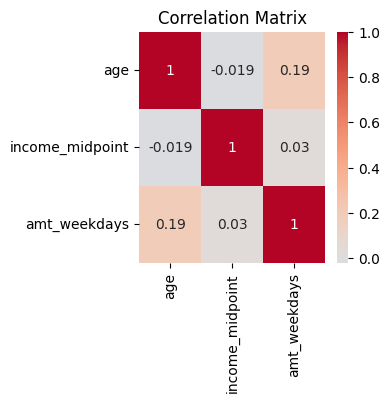

In [151]:
# Visualization: Heatmap of the correlation matrix
plt.figure(figsize=(3,3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

#SINGLE VARIANT ANALYSIS: taking 3 of the main features of dataset: age, gender, income


In [187]:
import matplotlib.pyplot as plt
# Calculate the proportion of smokers vs. non-smokers
smokers = df['smoke'].value_counts()
total = len(df)
smoke_prop = (smokers / total) * 100
print("Proportion of smokers vs non-smokers:")
print(smoke_prop, "\n")


Proportion of smokers vs non-smokers:
smoke
No     75.103489
Yes    24.896511
Name: count, dtype: float64 



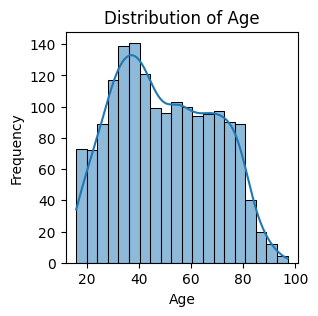

In [201]:
# Univariate Analysis: Age
plt.figure(figsize=(3,3))
sns.histplot(df['age'], kde=True, bins=20)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

count     1565.000000
mean     13498.785942
std      10457.233809
min       1300.000000
25%       7800.000000
50%       7800.000000
75%      18200.000000
max      40000.000000
Name: income_midpoint, dtype: float64


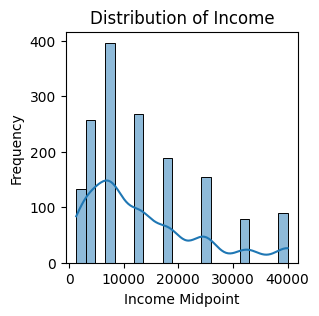

In [202]:
#Analyzing 'gross_income'
print(df['income_midpoint'].describe())
plt.figure(figsize=(3,3))
sns.histplot(df['income_midpoint'], kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income Midpoint')
plt.ylabel('Frequency')
plt.show()



Gender distribution:
 gender
Female    965
Male      726
Name: count, dtype: int64


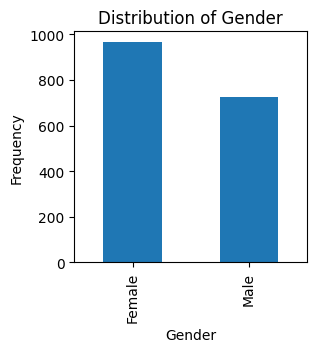

In [203]:
# Analysing 'gender':
gender_counts = df['gender'].value_counts()
print("\nGender distribution:\n", gender_counts)
plt.figure(figsize=(3,3))
gender_counts.plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()


BIVARIATE ANALYSIS:

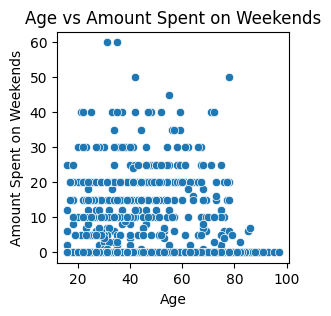

In [204]:
# Scatter plot: Age vs Amount Spent on Weekends
plt.figure(figsize=(3,3))
sns.scatterplot(x=data['age'], y=data['amt_weekends'])
plt.title("Age vs Amount Spent on Weekends")
plt.xlabel("Age")
plt.ylabel("Amount Spent on Weekends")
plt.show()

In [156]:
# Calculate the correlation coefficient
correlation_age_income = df['age'].corr(df['income_midpoint'])
print(f"Correlation between age and income midpoint: {correlation_age_income}")


Correlation between age and income midpoint: -0.15414419214486222


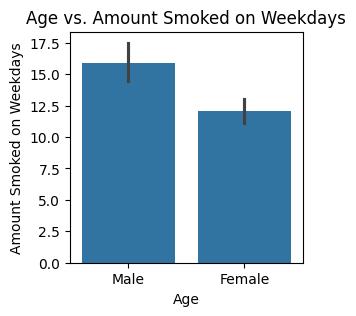

In [206]:
# Plotting 'age' vs 'amt_weekdays'
plt.figure(figsize=(3,3))
sns.barplot(x='gender', y='amt_weekdays', data=df)
plt.title('Age vs. Amount Smoked on Weekdays')
plt.xlabel('Age')
plt.ylabel('Amount Smoked on Weekdays')
plt.show()

In [200]:
# Calculate the correlation coefficient
correlation_age_amt_weekdays = df['age'].corr(df['amt_weekdays'])
print(f"Correlation between age and amount smoked on weekdays: {correlation_age_amt_weekdays}")


Correlation between age and amount smoked on weekdays: 0.1927825912998858


<Figure size 300x300 with 0 Axes>

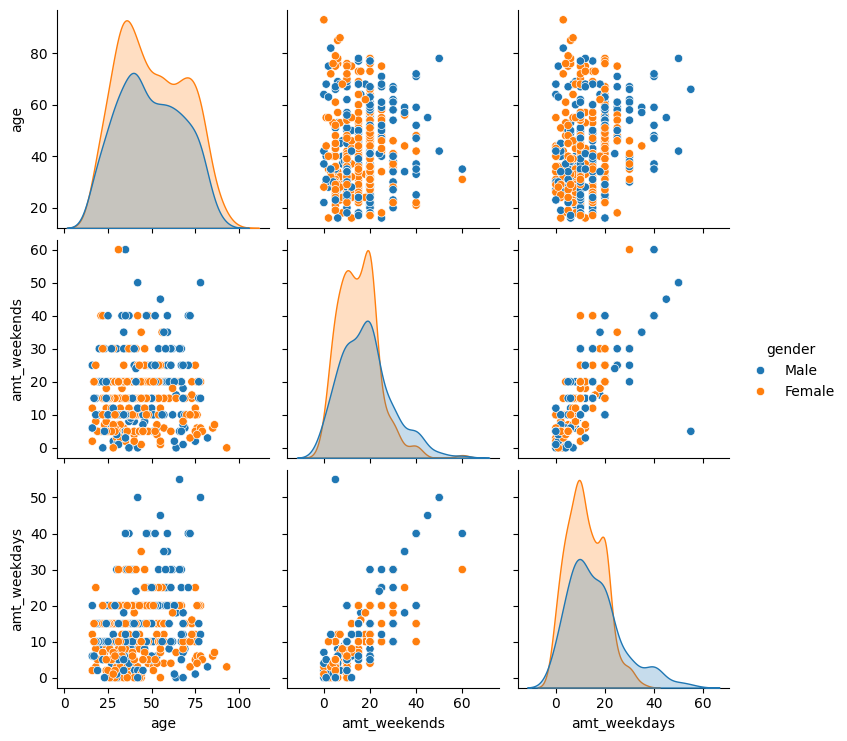

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/smoking.csv')

# Pairplot for multivariate analysis
plt.figure(figsize=(3,3))
sns.pairplot(data, hue='gender', vars=['age', 'amt_weekends', 'amt_weekdays'])
plt.show()


CHI SQUARE TEST

In [162]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['gender'], data['marital_status'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")


Chi-Square Statistic: 48.445161020497665, p-value: 7.621780966199694e-10


PEARSON COEFFECIENT:

In [163]:
# Calculate Pearson's correlation coefficient
correlation = data[['amt_weekends', 'amt_weekdays']].corr(method='pearson')
print(correlation)


              amt_weekends  amt_weekdays
amt_weekends      1.000000      0.802052
amt_weekdays      0.802052      1.000000


CLUSTERING

In [173]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features and standardize them
features = df[['age', 'amt_weekends', 'amt_weekdays']]
features.dropna(inplace=True)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


<ipython-input-173-90c28b76649e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace=True)


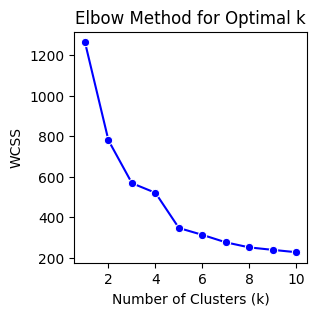

In [208]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(3,3))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()


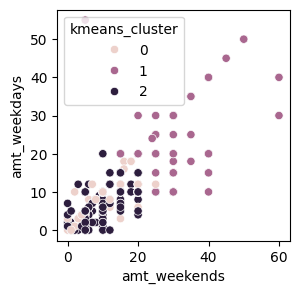

In [209]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_df = pd.DataFrame(features)
kmeans_df['kmeans_cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(3,3))
sns.scatterplot(x=kmeans_df['amt_weekends'], y=kmeans_df['amt_weekdays'], hue=kmeans_df['kmeans_cluster'])
plt.show()


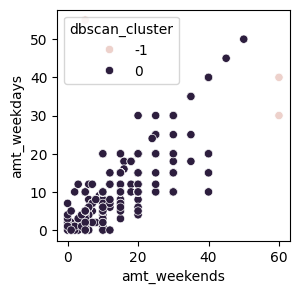

In [210]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
kmeans_df['dbscan_cluster'] = dbscan.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(3,3))
sns.scatterplot(x=kmeans_df['amt_weekends'], y=kmeans_df['amt_weekdays'], hue=kmeans_df['dbscan_cluster'])
plt.show()

#pink are outliers

LINEAR REGRESSION

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features and target variable
X = data[['age']]
y = data['amt_weekdays']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [184]:

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 52.7382140355865


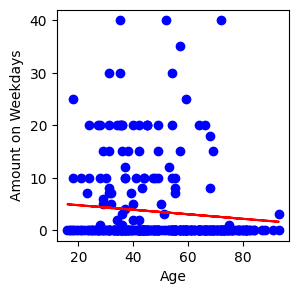

In [211]:
# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot regression line
plt.figure(figsize=(3,3))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Age')
plt.ylabel('Amount on Weekdays')
plt.show()

ADDITIONAL ANALYSIS:

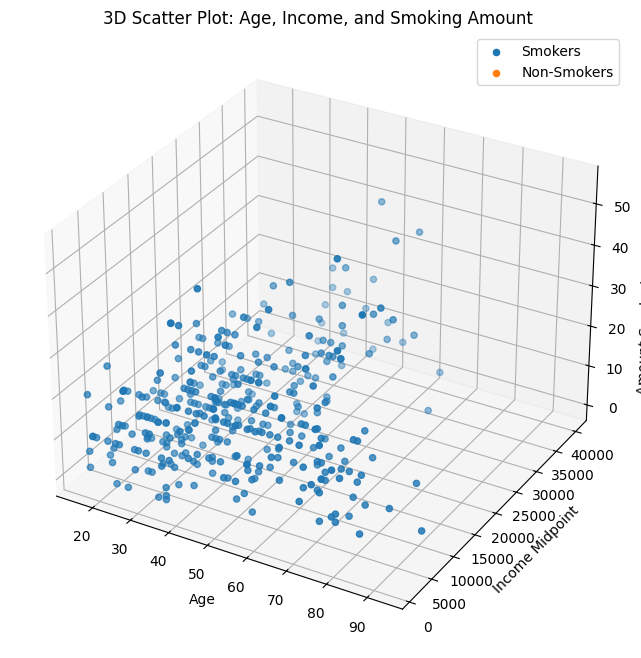

<Figure size 200x200 with 0 Axes>

In [213]:
#Additional analysis using 3d plots:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Filter for smokers with non-null income and smoking amount
smokers_data = df[(df['smoke'] == 'Yes') & (~df['income_midpoint'].isnull()) & (~df['amt_weekdays'].isnull())]
ax.scatter(smokers_data['age'], smokers_data['income_midpoint'], smokers_data['amt_weekdays'], label='Smokers')

non_smokers_data = df[(df['smoke'] == 'No') & (~df['income_midpoint'].isnull()) & (~df['amt_weekdays'].isnull())]
ax.scatter(non_smokers_data['age'], non_smokers_data['income_midpoint'], non_smokers_data['amt_weekdays'], label='Non-Smokers')

ax.set_xlabel('Age')
ax.set_ylabel('Income Midpoint')
ax.set_zlabel('Amount Smoked on Weekdays')
ax.set_title('3D Scatter Plot: Age, Income, and Smoking Amount')
ax.legend()
plt.figure(figsize=(2,2))
plt.show()
